In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

In [ ]:
!pip -q install pydot_ng
!pip -q install graphviz
!apt install graphviz > /dev/null

In [ ]:
import graphviz

In [ ]:
data=pd.read_csv("titanic.csv")

In [ ]:
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [ ]:
















data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [ ]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [ ]:
data["age"].fillna(data["age"].mean(),inplace=True)

In [ ]:
data.drop(['body','cabin'],1,inplace=True)

In [ ]:
data.dropna(axis=0,thresh=4)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.000000,0.0,0.0,24160,211.3375,S,2,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.916700,1.0,2.0,113781,151.5500,S,11,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.000000,1.0,2.0,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1.0,2.0,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1.0,2.0,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.500000,1.0,0.0,2665,14.4542,C,NaN,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,29.881135,1.0,0.0,2665,14.4542,C,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,7.2250,C,NaN,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,7.2250,C,NaN,NaN


In [ ]:
data["pclass"].mode()

0    3.0
dtype: float64

In [ ]:
data["pclass"].fillna(data["pclass"].mode()[0],inplace=True)

In [ ]:
data["survived"].fillna(data["survived"].mode()[0],inplace=True)

In [ ]:
data["name"].fillna(data["name"].mode()[0],inplace=True)

In [ ]:
data["sex"].fillna(data["sex"].mode()[0],inplace=True)

In [ ]:
data["sibsp"].fillna(data["sibsp"].mode()[0],inplace=True)

In [ ]:
data["parch"].fillna(data["parch"].mode()[0],inplace=True)

In [ ]:
data["ticket"].fillna(data["ticket"].mode()[0],inplace=True)

In [ ]:
data["fare"].fillna(data["fare"].mean(),inplace=True)

In [ ]:
data["embarked"].fillna(data["embarked"].mode()[0],inplace=True)

In [ ]:
data["boat"].fillna(data["boat"].mode()[0],inplace=True)

In [ ]:
data["home.dest"].fillna(data["home.dest"].mode()[0],inplace=True)

In [ ]:
data.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
embarked     0
boat         0
home.dest    0
dtype: int64

In [ ]:
data["ticket"] = data['ticket'].apply(pd.to_numeric, errors='coerce') 

In [ ]:
data["ticket"].fillna(data["ticket"].mode()[0],inplace=True)

In [ ]:
data.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket       float64
fare         float64
embarked      object
boat          object
home.dest     object
dtype: object

In [ ]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

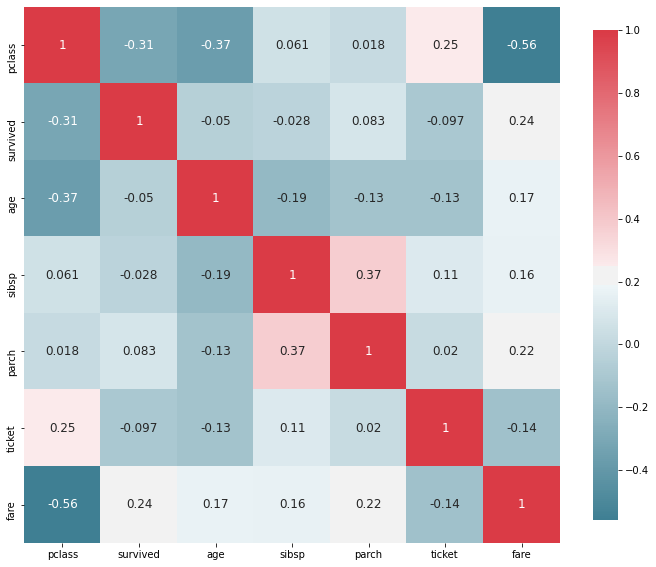

In [ ]:
plot_correlation_map(data)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['pclass']=encoder.fit_transform(data['pclass'])

In [ ]:
data[['pclass','survived']].groupby(['pclass'],as_index=True).mean()

,survived
pclass,
0,0.619195
1,0.429603
2,0.254930


In [ ]:
data['names']=pd.DataFrame(data.name.str.split(',',expand=True)[:][1].str.split('.',expand=True)[:][0])

In [ ]:
data.names

0          Miss
1        Master
2          Miss
3            Mr
4           Mrs
         ...   
1305       Miss
1306         Mr
1307         Mr
1308         Mr
1309       Miss
Name: names, Length: 1310, dtype: object

In [ ]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }
data['names']=data['names'].str.strip()
data['names']=data['names'].map(Title_Dictionary)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


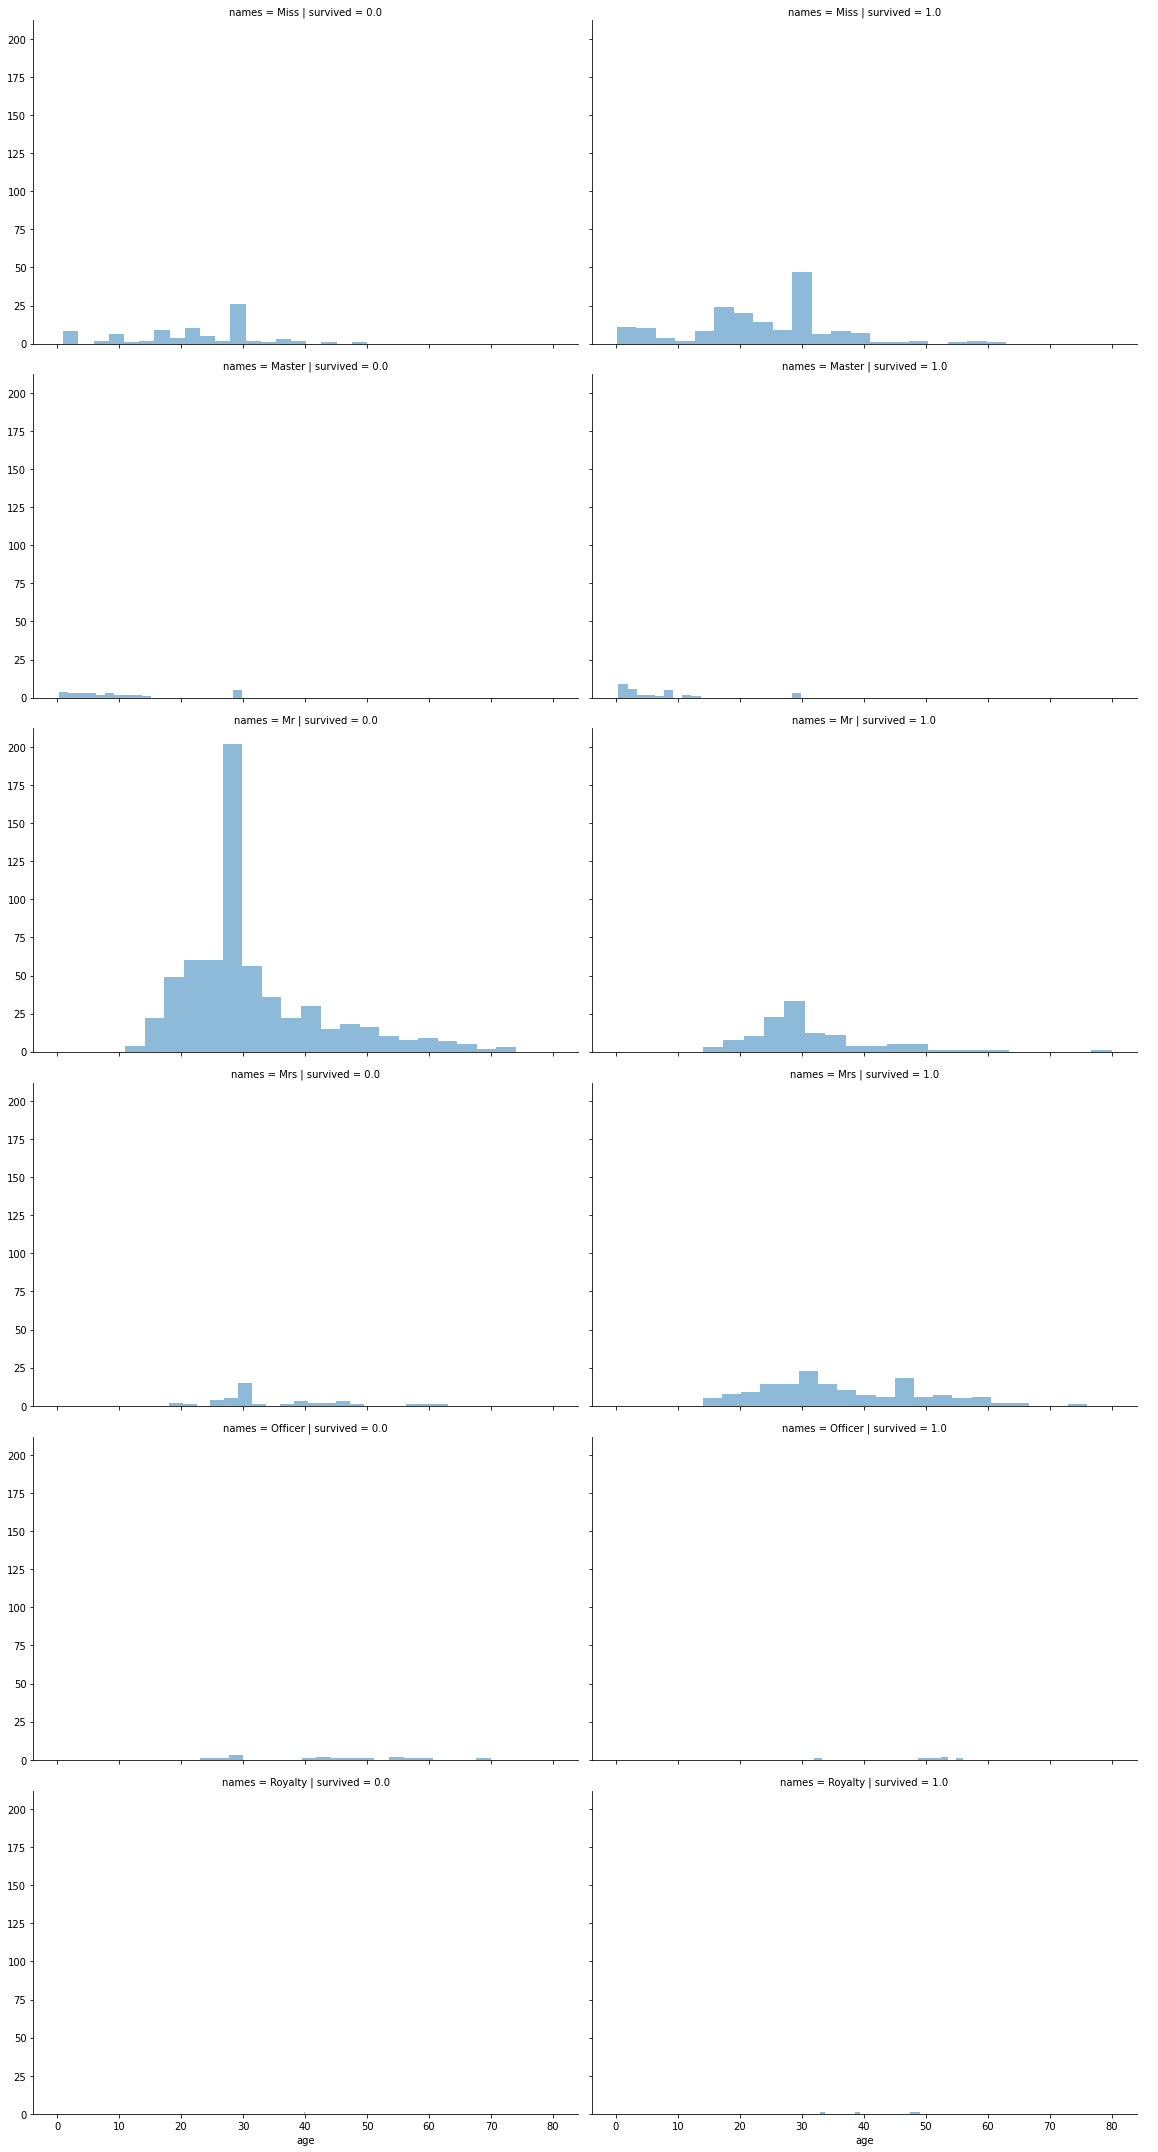

In [ ]:
grid = sns.FacetGrid(data,col='survived', 
    row='names', size=5, aspect=1.6)
grid.map(plt.hist,'age', alpha=.5, bins=20)
grid.add_legend()

In [ ]:
familysize=pd.DataFrame()
familysize['family']=data['parch']+data['sibsp']
familysize.head()

,family
0,0.0
1,3.0
2,3.0
3,3.0
4,3.0


In [ ]:
data['family']=familysize

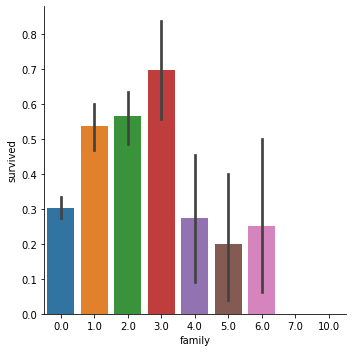

In [ ]:
grid = sns.catplot(data=data,x='family',y='survived',kind="bar")

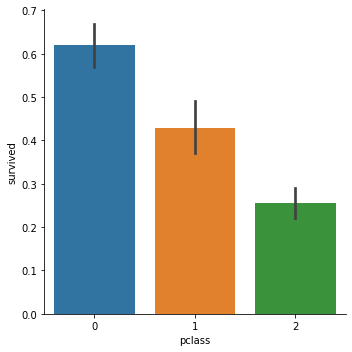

In [ ]:
grid = sns.catplot(data=data,x='pclass',y='survived',kind="bar")

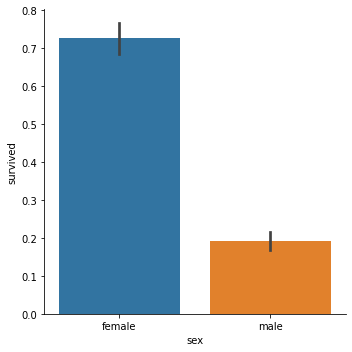

In [ ]:
grid = sns.catplot(data=data,x='sex',y='survived',kind="bar")

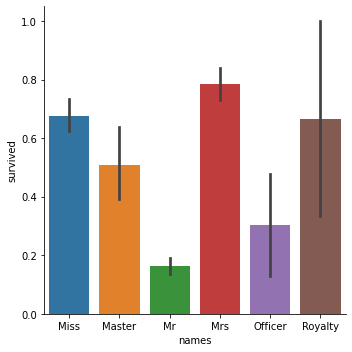

In [ ]:
grid = sns.catplot(data=data,x='names',y='survived',kind="bar")

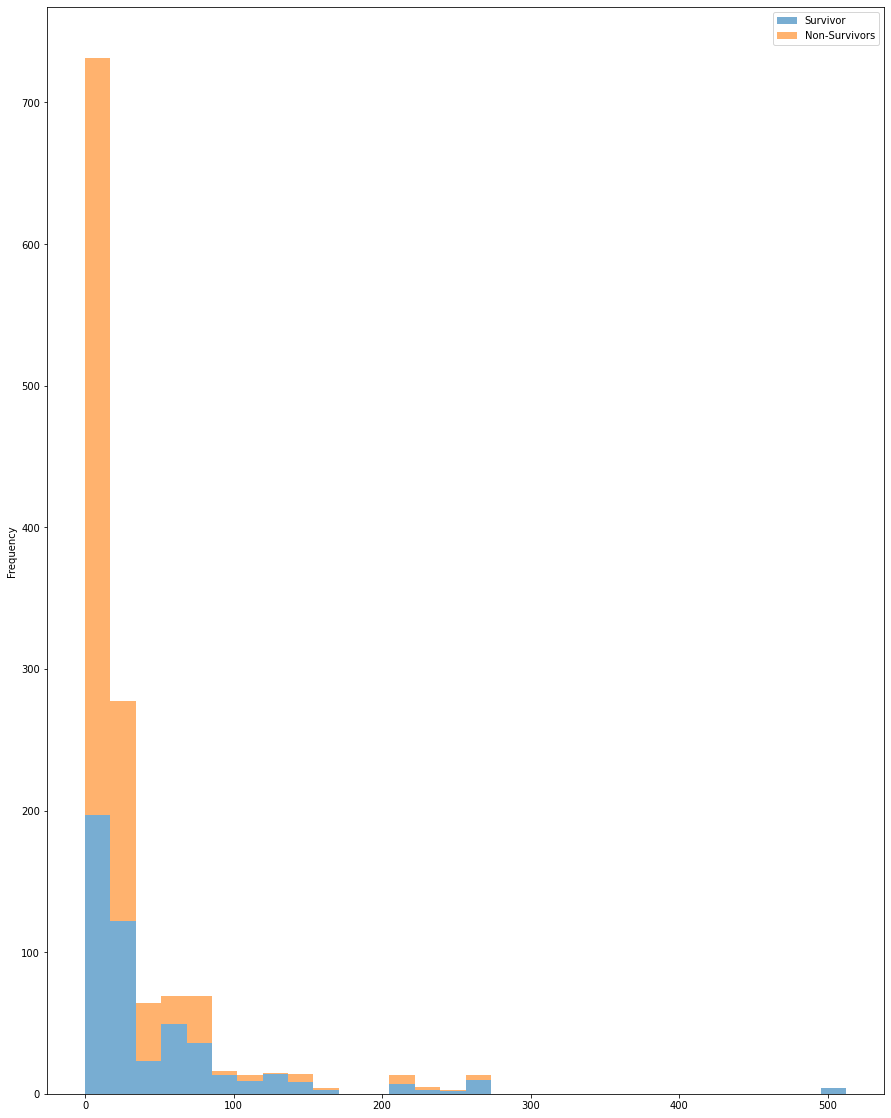

In [ ]:
pd.DataFrame({'Survivor' : data.groupby('survived').get_group(1).fare,
              'Non-Survivors': data.groupby('survived').get_group(0).fare}).plot.hist(stacked=True, alpha=.6, bins=30, figsize = (15,20))

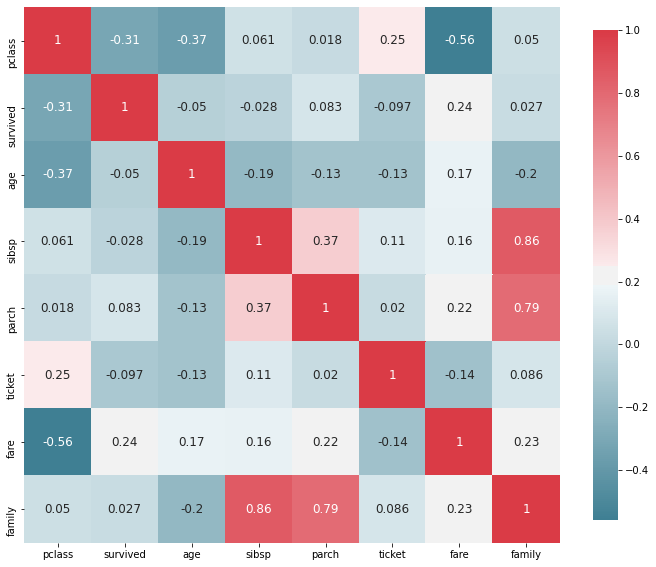

In [ ]:
plot_correlation_map(data)

In [ ]:
encoder=LabelEncoder()
data['sex']=encoder.fit_transform(data['sex'])

score:0.8244274809160306


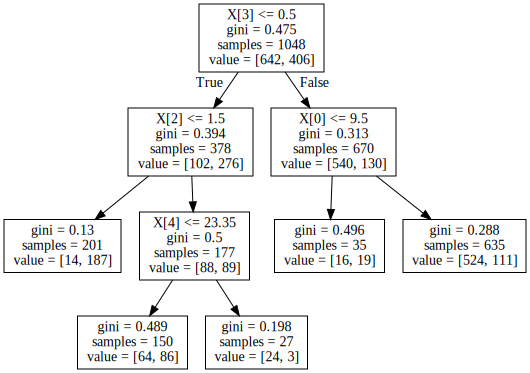

In [ ]:
#features extraction
x=data[["age","family","pclass","sex","fare"]]
y= data["survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=40)

#applying tree algorithm
tree_1 = DecisionTreeClassifier(criterion='gini',splitter='best',max_leaf_nodes= 5)  
tree_1.fit(x_train, y_train)   #fitting our model
y_pred=tree_1.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

dot_data=tree.export_graphviz(tree_1,out_file=None)
graph=graphviz.Source(dot_data)
graph.render("data")
graph

In [ ]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

x=data[["age","family","pclass","sex","fare"]]
y= data["survived"]
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25,random_state=41) #splitting data with test size of 30%
y_pred=tree_1.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8201219512195121
